In [1]:
import fault_injector.generate_data as gd
import fault_injector.injector as injector
import pandas as pd

## Generate Data

In [2]:
rand_max = 0.52
rand_min = 0.48
size = 500

In [3]:
gen1 = gd.DataGen(rand_max, rand_min, size)

In [4]:
gen1.random_gen()

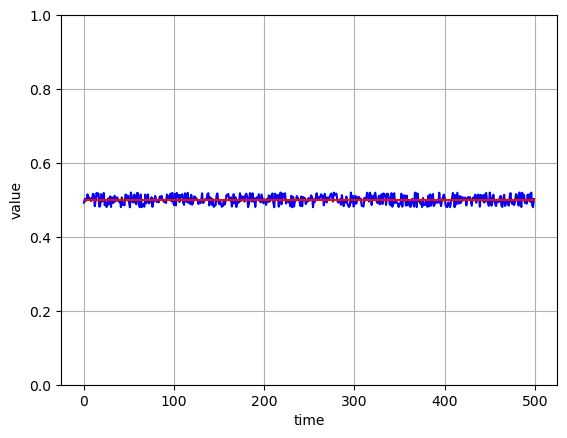

In [5]:
gen1.plot_values()

## Inject Fault into Generated Data
### Inject Drift

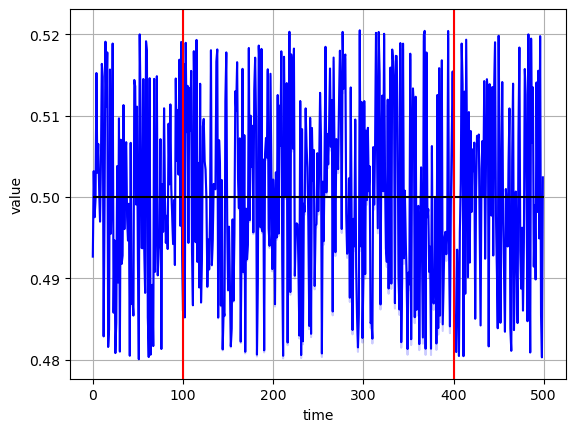

In [6]:
fault1 = injector.FaultInjection(values=gen1.values, start=100, stop=400, increasing=1)
fault1.inject_drift()
fault1.plot_compare_values()

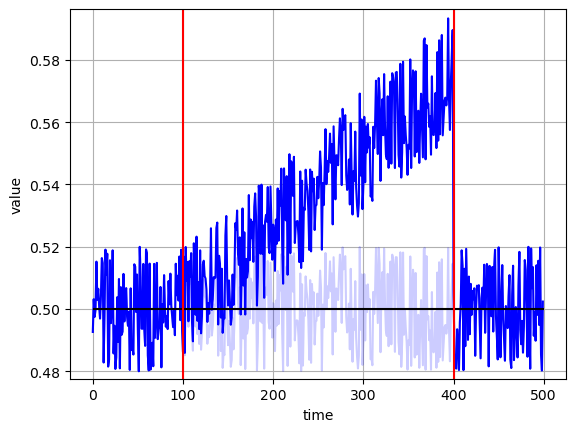

In [7]:
# specify drift rate
fault1.reset_values()
fault1.inject_drift(drift_rate=0.00025)
fault1.plot_compare_values()

### Inject Offset

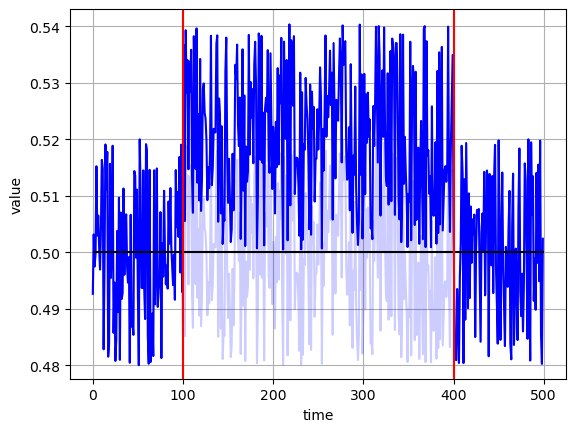

In [8]:
fault1.reset_values()
fault1.inject_offset()
fault1.plot_compare_values()

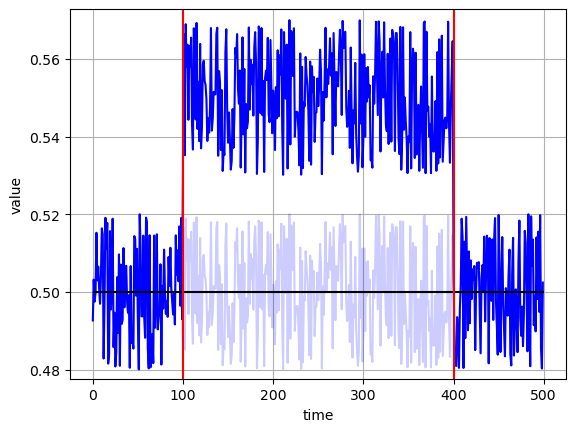

In [9]:
# specify offset_rate
fault1.reset_values()
fault1.inject_offset(offset_rate=0.1)
fault1.plot_compare_values()

## Inject NaN

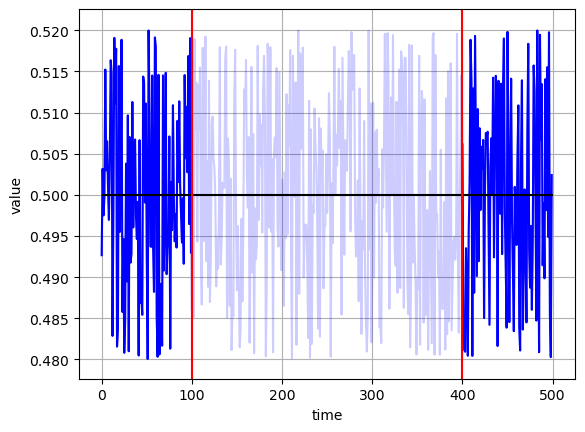

In [10]:
fault1.reset_values()
fault1.inject_nan()
fault1.plot_compare_values()

## Inject Stuck Value

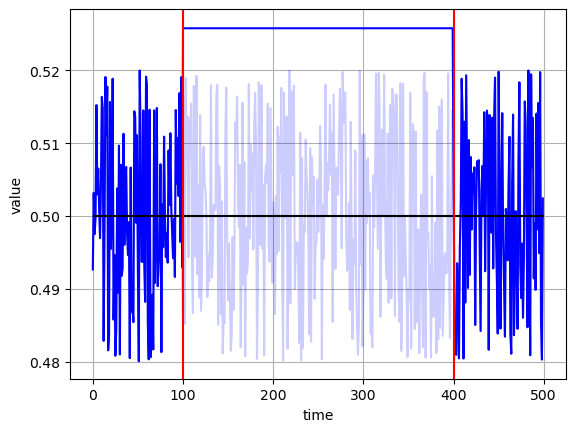

In [11]:
# random stuck value
fault1.reset_values()
fault1.inject_stuck_value()
fault1.plot_compare_values()

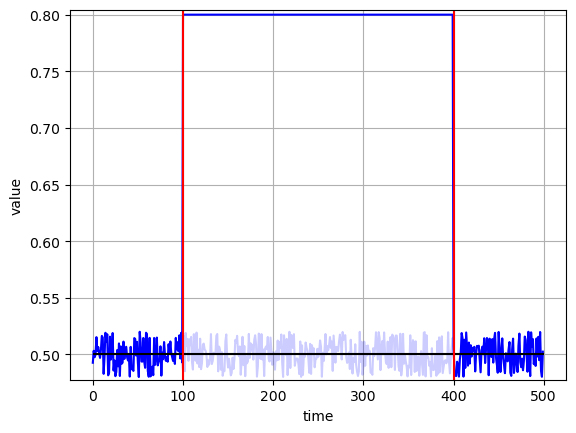

In [12]:
# specified stuck value
fault1.reset_values()
fault1.inject_stuck_value(stuck_val = 0.8)
fault1.plot_compare_values()

## Noise: Gaussian

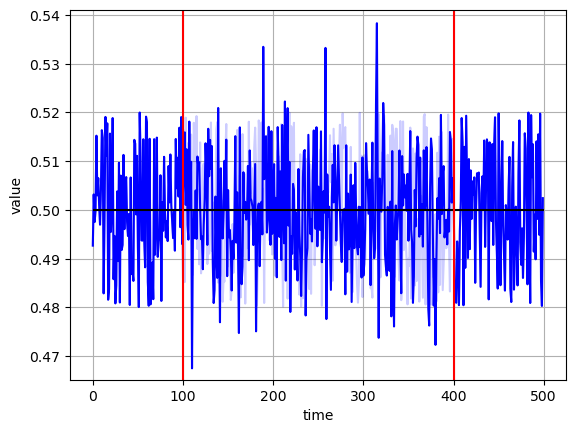

In [13]:
fault1.reset_values()
fault1.inject_noise(noise_type='gaussian')
fault1.plot_compare_values()

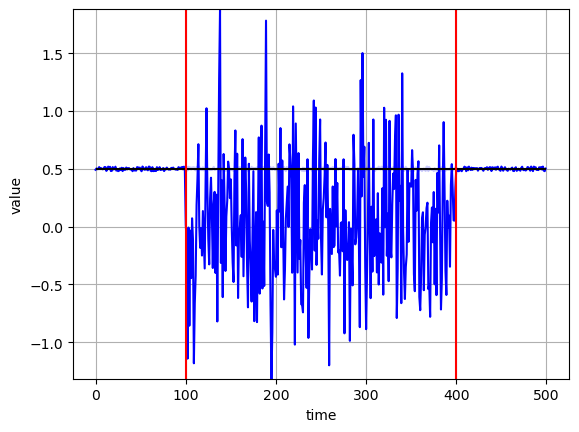

In [14]:
# Specify params
mean_val = 0
std = 0.5
fault1.reset_values()
fault1.inject_noise(noise_type='gaussian', params=[mean_val, std])
fault1.plot_compare_values()

## Noise: Uniform

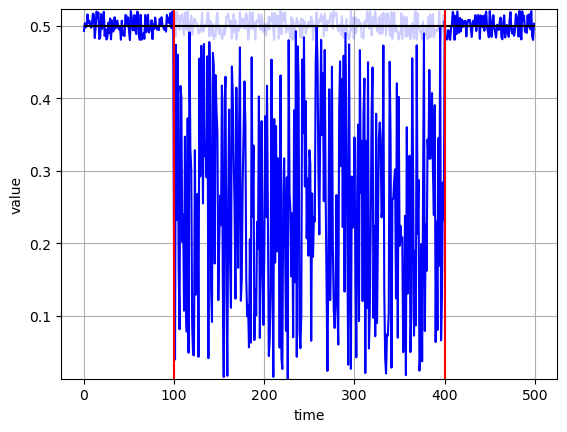

In [15]:
fault1.reset_values()
fault1.inject_noise(noise_type='uniform')
fault1.plot_compare_values()

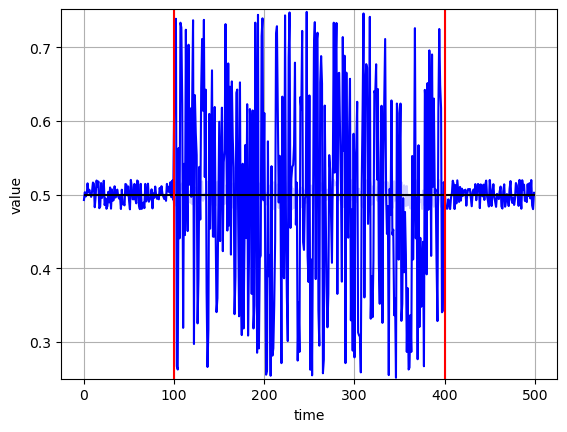

In [16]:
# specify vals
min_val = 0.25
max_val = 0.75
fault1.reset_values()
fault1.inject_noise(noise_type='uniform', params=[min_val, max_val])
fault1.plot_compare_values()

## Working with a DataFame

In [17]:
# generate synthetic data
gen_dict = {}
def gen_values(rand_max, rand_min, size):
    gen = gd.DataGen(rand_max, rand_min, size)
    gen.random_gen()
    return gen.values

gen_dict['x'] = gen_values(0.52, 0.48, 1000)
gen_dict['y'] = gen_values(8100, 7900, 1000)
gen_dict['z'] = gen_values(1.1, 0.9, 1000)

df = pd.DataFrame(gen_dict)

x


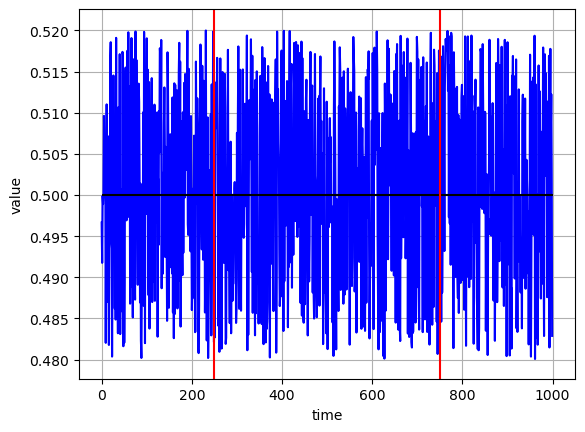

y


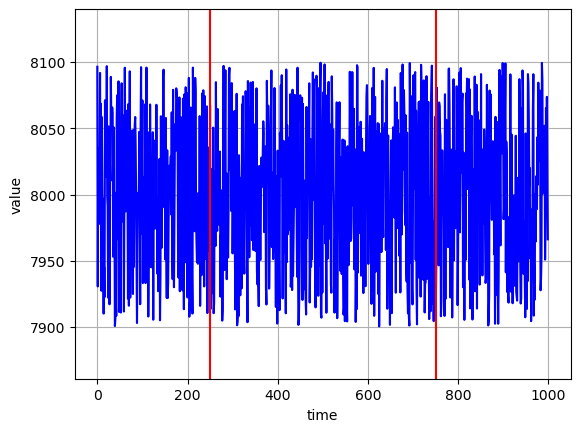

z


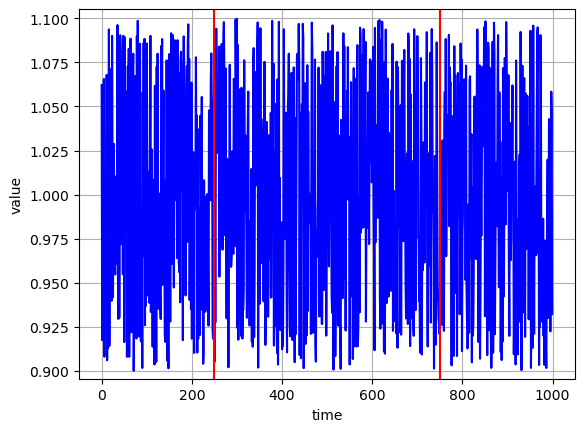

In [18]:
# define columns that you would like to inject a fault into
col_lst = df.columns
start_val = 250
stop_val = 750
fault_dict = injector.DataFrameFaultInjection(df, column_names=col_lst, start_val=start_val, stop_val=stop_val)

# visualize the starting values for the selected columns
for key in fault_dict.keys():
    print(key)
    fault_dict[key].plot_compare_values()

x


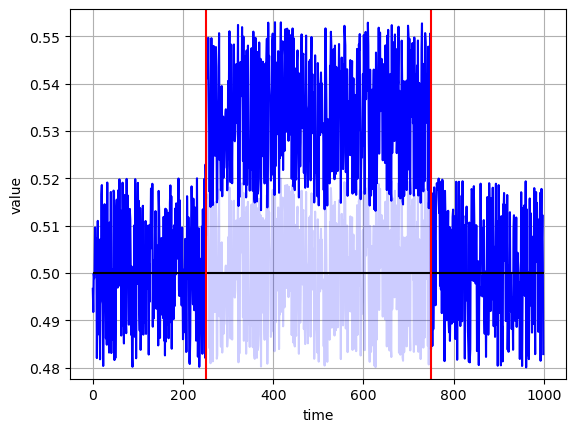

y


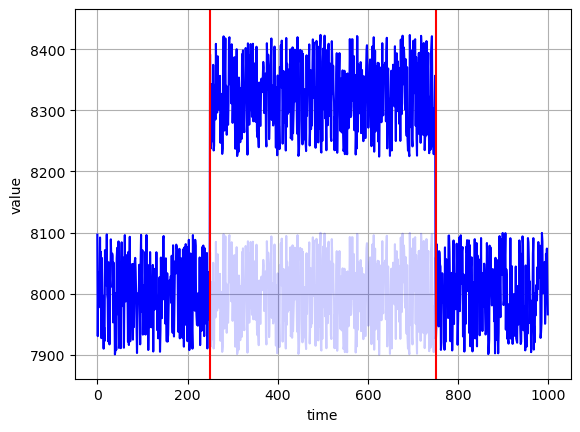

z


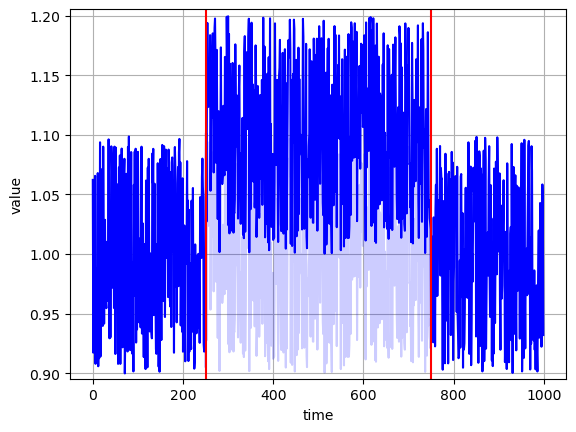

In [19]:
# inject fault and visualize
for key in fault_dict.keys():
    print(key)
    fault_dict[key].inject_offset()
    fault_dict[key].plot_compare_values()

In [20]:
# update df with faulty data
fault_df = injector.update_df(df, fault_dict)
fault_df.head()

,x,y,z
0,0.496656,8096.463362,1.062203
1,0.491766,7930.619069,0.917387
2,0.499903,8034.572713,1.024994
3,0.498903,7977.618407,0.939216
4,0.500067,7982.613416,1.055958
